# **Introduction**
This analysis was made using the Medical Cost Personal Dataset, available on the website www.kaggle.com

The motivation is to analyze the variables and the relation with the charges of each people, getting important insights.

This can be important to alert people about smoking for example.

Questions I will try to answer:

Is there a big difference between the charges of smokers and no smokers?

Is there some difference of the charge for people who has children?

Quantity of smokers by age



**Importing libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load dataset**

In [16]:
df = pd.read_csv('insurance.csv')

In [17]:
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.shape

(1338, 7)

In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## What is the proportion of smokers?

In [21]:
smokers = df.loc[df['smoker']=='yes'].shape[0]
proportion = ((smokers / df.shape[0])*100)
print(round(proportion, 2))

20.48


## Is there a big difference between the charges of smokers and no smokers?

In [22]:
smokers_mean = df.loc[df['smoker'] == 'yes', 'charges'].mean()
nosmokers_mean = df.loc[df['smoker'] == 'no', 'charges'].mean()

print(f' The smokers charges mean is: {smokers_mean.round(2)}')
print(f' The no smokers charges mean is: {nosmokers_mean.round(2)}')



 The smokers charges mean is: 32050.23
 The no smokers charges mean is: 8434.27


It is possible to see that the smokers has more charges than no smokers
Maybe the smokers has more health problems than no smokers

## What is the BMI mean for smokers? What about BMI mean of no smokers?


In [23]:
smokers_bmi_mean = df.loc[df['smoker'] == 'yes', 'bmi'].mean()
nosmokers_bmi_mean = df.loc[df['smoker'] == 'no', 'bmi'].mean()
print(f' The smokers bmi mean is: {smokers_bmi_mean.round(2)}')
print(f' The no smokers bmi mean is: {nosmokers_bmi_mean.round(2)}')



 The smokers bmi mean is: 30.71
 The no smokers bmi mean is: 30.65


It is possible to see that there is not a big difference between the bmi mean of smokers and no smokers

## Is there some difference of the charge for people who has children?

In [24]:
nochildren_charges_mean = df.loc[df['children'] == 0, 'charges'].mean()
children_charges_mean = df.loc[df['children'] != 0, 'charges'].mean()


print(f'The charges mean of people who do not have children is: {nochildren_charges_mean.round(2)}')
print(f'The charges mean of people who do have children is: {children_charges_mean.round(2)}')


The charges mean of people who do not have children is: 12365.98
The charges mean of people who do have children is: 13949.94


It is possible to see that people who do have children have more charges than people who do not have children

## Quantity of smokers by age

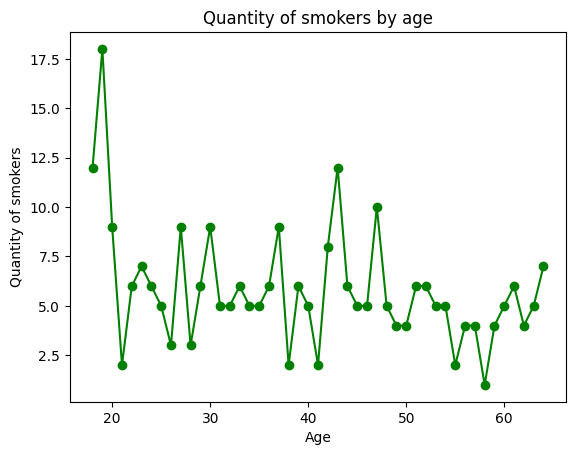

In [25]:
# gráfico das pessoas fumantes

df_smokers = df.loc[df['smoker'] == 'yes']

smokers_by_age = df_smokers.groupby('age').size()

plt.plot(smokers_by_age.index, smokers_by_age.values, marker='o', linestyle='-', color='g')

plt.title('Quantity of smokers by age')
plt.xlabel('Age')
plt.ylabel('Quantity of smokers')

plt.show()


## Which gender has more smokers?

In [26]:
male_smokers = df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'male')].shape[0]
female_smokers = df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'female')].shape[0]

print(f'{male_smokers} are male smokers')
print(f'{female_smokers} are female smokers')




159 are male smokers
115 are female smokers


It is possible to see that males smoke more than females

## Which region has more smokers?

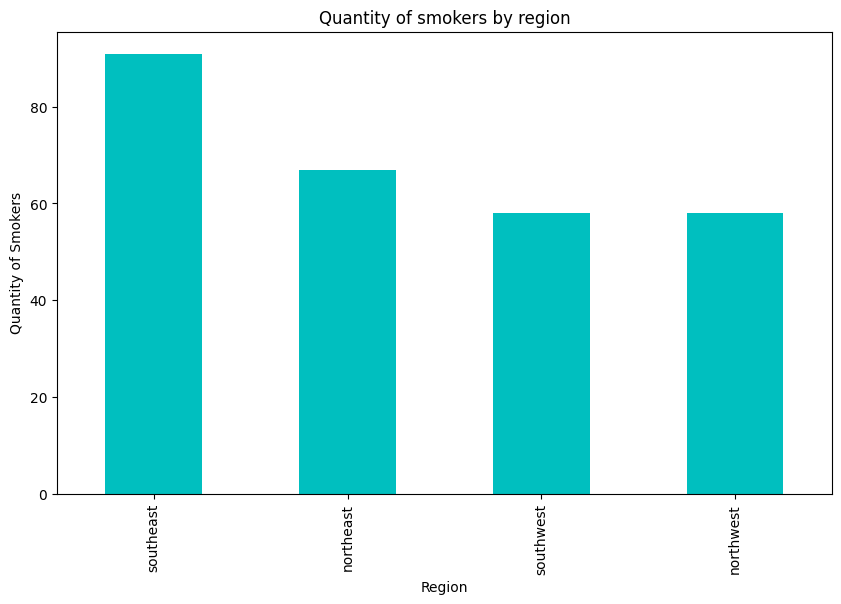

In [27]:


smokers_by_region = df_smokers['region'].value_counts()

plt.figure(figsize=(10, 6))
smokers_by_region.plot(kind='bar', color='c')

plt.title('Quantity of smokers by region')
plt.xlabel('Region')
plt.ylabel('Quantity of Smokers')

plt.show()


## What is the mean of smokers in each region?

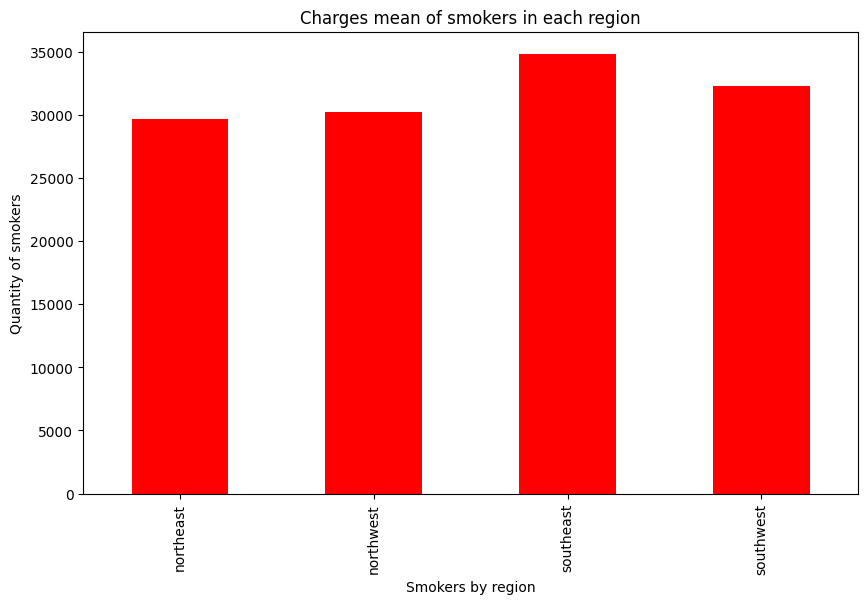

In [28]:
smokers_charges_by_region = df_smokers.groupby('region')['charges'].mean()

plt.figure(figsize=(10, 6))
smokers_charges_by_region.plot(kind='bar', color='r')

plt.title('Charges mean of smokers in each region')
plt.xlabel('Smokers by region')
plt.ylabel('Quantity of smokers')

plt.show()

It is possible to see that there is not a big relation between the charges considering the quantity of smokers by region